# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

In [154]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.3.0
numpy: 1.16.4
matplotlib: 3.1.0
pandas: 0.24.2
sklearn: 0.21.2


----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [155]:
# 
# Using Python 3
#
# Import libraries necessary for this project
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=10))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
6,49,Private,9th,5.0,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0.0,0.0,16.0,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K
8,31,Private,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K
9,42,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178.0,0.0,40.0,United-States,>50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [156]:
# TODO: Total number of records
n_records = data.shape[0]

# Count the different values for income:
n_values = data.income.value_counts()

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = n_values['>50K']
# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = n_values['<=50K']

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = n_greater_50k / n_records * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))



Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

/Users/m/projects/onlineclasses/ML_Nanodegree/Project2/visuals.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


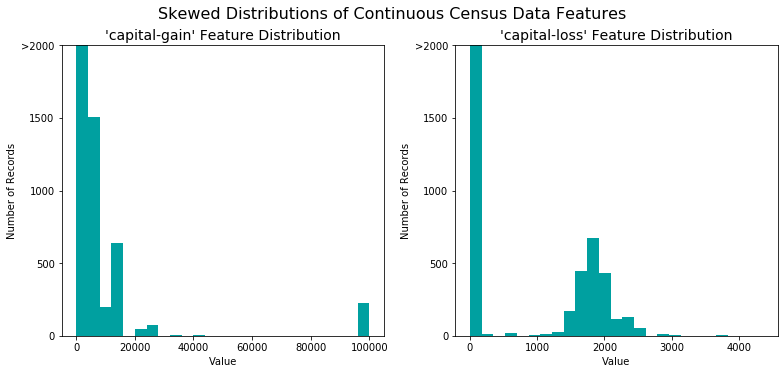

In [157]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

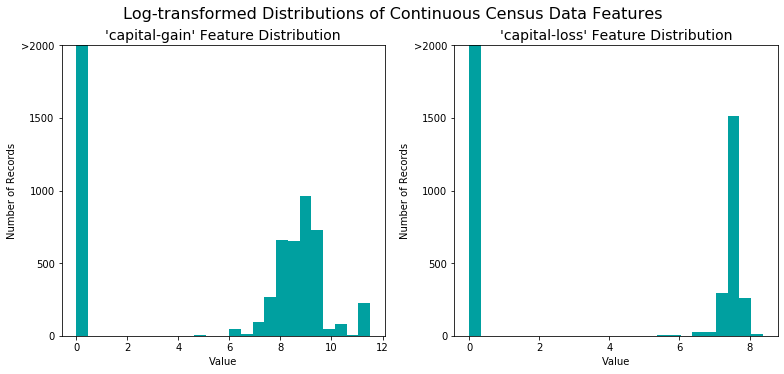

In [158]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [159]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [160]:
### Checking how sparse is our data...
from numpy import count_nonzero
A = np.asarray(features_log_minmax_transform)
sparcity = 1.0 - count_nonzero(A) / A.size
print("Sparcity {:.2f}".format(sparcity))

Sparcity 0.14


In [161]:
from sklearn import preprocessing

# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
le.fit(income_raw)
income = le.transform(income_raw) 

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
#print (encoded)
#print (income)
#display(features_final.head(n = 5))

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [162]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [163]:
import math

#TP = np.sum(income)# Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
# encoded to numerical values done in the data preprocessing step.
TP = n_greater_50k 
#FP = income.size - TP # Specific to the naive case
FP = n_at_most_50k 


TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = TP / n_records
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1 + math.pow(beta,2)) * (precision * recall) / ((math.pow(beta,2) * precision) + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

----

## Decision Trees:

It seems that a raw Decision Tree algorithm is used only for very basic or limited use cases, or requires a lot of prework for data wrangling. Some examples I found were around Customer Relationship management, fraud detection, or fault diagnosis. Still, Decision-Tree is a great asset for Ensemble algorithms. By using decision trees in AdaBoot or XGBoost, for example, scores can be greatly improved. XGBoost seems extremely popular on Kaggle.com. A simple search on various algorithms shows 18K hits for XGBoost while all others were a level of degree less with below 5k or as little as 100.

### _Advantages_:

* Decision tree models tend to be easy to explain since the results are a set of rules - very intuitive to humans and very easy to visualize.
* Those are simple algorithms with a small set of hyperparameters to play with.
* Decision Trees tend to be very fast at training and they seem to be immune to noise or missing values

### _Disadvantages_:

* Decision trees tend to overfit the model if we don't use the appropriate hyperparameters
* They also tend to give low prediction accuracy compared to other algorithms, (Can be improved using ensemble, like random forest or XGBoost)
* Complexity increases rapidly as class labels increases
* Tend to be unstable - small changes in the data set can lead to large changes in the model structure.
* It can be biased to categories with more levels.

### _Use for CharityML_:

Decision Trees seem to be a good option, in this case, to start getting familiar with the data, see some results with a quick training and start getting a feeling on how well a model could behave. Also, since we did a fair amount of data preparation with encoding our features and normalizing some of the data, this should get us to some fair results with this simple algorithm.

## Support Vector Classifier

SVM algorithms have successfully been used for face detection, text and hypertext categorization, image classification, bioinformatics, protein fold, handwriting recognition among other users. All these problems show a high number of features.

### _Advantages_:

* SVC tends to be somewhat data agnostic, performing well when not a lot of knowledge of data is available.
* This algorithm is very flexible, supporting multiple kernel functions helping solve different complex problems
* It scales well to high dimensional data
* Is easy to generalize and not prone to overfitting
* Works well for data with that shows a clear margin of separation

### _Disadvantages_:
* Need to choose the best kernel for the problem, requiring a good level of experimentation
* Large data sets tend to train for long periods, very computing-intensive
* It is somewhat difficult to calibrate the model, due to being very opaque, i.e., it's difficult to interpret the final model, as the solution is more of a black box.
* Does not perform well with data sets with lots of noise - target classes are overlapping (no clear margin of separation)

### _Use for CharityML_:

Since I'm just learning the data, this algorithm can help us see how well an ML model will behave against it. Another nice feature of SVC is Its flexibility due to its several kernels that can be applied. After performing the one-hot swap, the number of features increased to 103, and this model tends to work well with even higher levels of dimensionality.

## KNeighborClassifier

KNN is big in Recommendation systems since the number of features can easily be controlled and new data points added at any time. Another big use is concept search, where you can map a document to similar ones grouping them by topic for example.

### _Advantages_:

* Since KNN is a lazy algorithm, the training phase is super fast where all data points are used at the time of prediction. It can easily predict based on new data points since training is minimum.
* KNN tends to be very useful for nonlinear data.
* It's generally easy to interpret the prediction.

### _Disadvantages_:

* Complexity in searching the nearest neighbors for each sample.
* Slow testing times compared to other algorithms.
* Requires scaling the data! (Sensitive to magnitude)
* It does not scale well for a large number of features and can suffer from the Curse of Dimensionality: to avoid overfitting, the needed data will need to grow exponentially as you increase the number of dimensions.

### _Use for CharityML_:

Even though KNN can show some complexities in finding its nearest neighbor and might suffer from the Curse of Dimensionality, this algorithm still offers some good advantages to study our CharityML. One of them is lazy training, where the algorithm can perform predictions without any training and provide valuable feedback almost instantaneously. 


## References:

* https://medium.com/@sagar.rawale3/understanding-decision-tree-algorithm-drawbacks-and-advantages-4486efa6b8c3
* https://en.wikipedia.org/wiki/Decision_tree
* https://scikit-learn.org/stable/modules/tree.html
* https://web.cs.ucdavis.edu/~vemuri/classes/ecs271/lecture3.pdf
* https://xgboost.readthedocs.io/en/latest/tutorials/index.html
* http://what-when-how.com/artificial-intelligence/decision-tree-applications-for-data-modelling-artificial-intelligence/
* https://www.kaggle.com/search
* https://statinfer.com/204-6-8-svm-advantages-disadvantages-applications/
* https://en.wikipedia.org/wiki/Support-vector_machine
* https://scikit-learn.org/stable/modules/svm.html
* https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
* https://data-flair.training/blogs/applications-of-svm/
* https://scikit-learn.org/stable/modules/neighbors.html#classification
* https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
* https://medium.com/datadriveninvestor/k-nearest-neighbors-knn-7b4bd0128da7
* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
* Thoughtful Machine Learning with Python by Matthew Kirk (ISBN: 9781491924129)

----

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [165]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

beta = 0.5

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train[:300], beta)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
#    print("Final accuracy score on the testing data: {:.4f}".format(results['acc_test']))
#    print("Final F-score on the testing data: {:.4f}".format(results['f_test']))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

DecisionTreeClassifier trained on 361 samples.
DecisionTreeClassifier trained on 3617 samples.
DecisionTreeClassifier trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.
SVC trained on 361 samples.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 3617 samples.
SVC trained on 36177 samples.


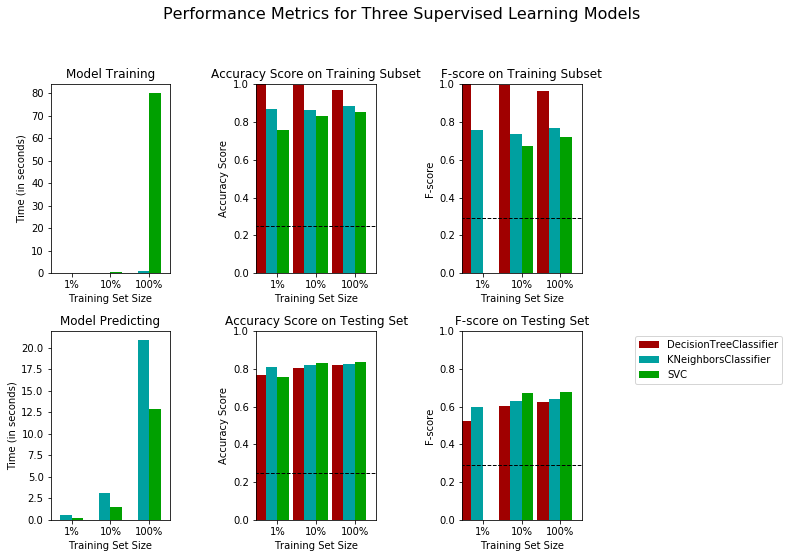

In [166]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=51)
clf_B = KNeighborsClassifier()
clf_C = SVC(random_state=51, gamma='auto') # Setting gamma to the default, just to avoid warnings.
#clf_B = GaussianNB()
#clf_D = SGDClassifier(random_state=51)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100 * 0.1)
samples_1 = int(samples_100 * 0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
#for clf in [clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

** Answer: **

---

After initial experimentation with some algorithms and capturing some data, the SVC demonstrated slightly better results on our current census data set, especially for our f-beta scores, which is one of the scores we are paying more attention to since CharityML is more focused on having a good precision over general accuracy. The SVC algorithm showed a fbeta-score above 0.6 for the full test set. The Decision tree model was very fast at training and predicting, but while the training scores were always very high close to 100%, the testing scores were lacking, showing signs of overfitting the data. In other words, it is memorizing the training data and not generalizing enough for data that the model has never seen before. The KneighborClassifier also showed some very good accuracy and f-score results, very close to SVC results, but it seems that the training scores were relatively higher than the testing scores, also showing some tendencies of overfitting or being affected by the Curse of Dimensionality. 

Since SVC performs well with a large number of dimensions and it offers several hyperparameters for us to tune in, it seems appropriate to try and improve its results by experimenting with different kernels and tweaking some of those parameters. We do suffer a penalty on training time, but a census data set tends to be stable and won't require a lot of retraining beyond an initial time and we can easily train the model before prediction time is needed. If the data set starts growing exponentially, maybe a Stochastic Gradient Descent could become more appropriate. 

In Summary, SVC seems to be a good model suitable for the data at hand, because it can handle a large number of features, is not prone to overfitting and we can control the level of error (hyperparameter C) to nudge it even further to achieve better precision, required by CharityML.


---

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

** Answer: ** 

--- 

The chosen model tries to divide the data points into the classifications we defined: individuals that have an income greater than 50K and those individuals that earn less than 50K a year. This model, the Support Vector Machine, or SVM for short, also includes the calculation of a margin between the points from the separation point to maximize success. We can control this margin to increase accuracy and properly classify a data point or increase the margins and achieve more generalization at the expense of some mistakes.  Support Vector Machines are great for data sets that have a large number of features and tend to operate better than most other algorithms with high dimensional data. 

The model is trained by trying to separate the classified data points with the best hyperplane possible. By best, I mean, it tries to find the hyperplane with the most margin between points by calculating the distance of each data point to the hyperplane (and this margin can be controlled by the C hyperparameter). Furthermore, this works well because SVM can use a special function, called the kernel, to transform data points to higher dimensions and separate the data in a higher dimension. The most common kernel functions are linear, poly and RBF (Radial Basis Function). Each one of those can be further tuned by working specific hyperparameters. For example, for the poly or RBF,  we can tune the gamma parameter which plays a big role in whether the model is overfitting, underfitting, or generalizing well. This parameter indicates the influence a single data point can reach. Too big the gamma value and the model might overfit with some narrow curves; too small and it might underfit with too wide curves. For poly kernels, you can directly determine the degree to which polynomials will be created controlling the planes to divide the data. 

In the next step, I'll be using the GridSearch to experiment with different kernels and its hyperparameters to try and improve the current f-scores of our model.

---


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [167]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
# TODO: Initialize the classifier
#clf = KNeighborsClassifier()
clf = SVC(random_state=51)
# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#parameters =  {'n_neighbors': [1,3,5,7,9],
#               'algorithm' : ['ball_tree', 'kd_tree', 'brute']}
parameters =  [
               {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 'scale'], 'C': [0.1, 1, 10]},
               {'kernel': ['linear'], 'C': [0.1, 1, 10]},
               {'kernel': ['poly'], 'degree': [2,3,5,10],'gamma': [1e-3, 1e-4, 'scale'], 'C': [0.1, 1, 10]}
              ]
# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/py

Unoptimized model
------
Accuracy score on testing data: 0.8371
F-score on testing data: 0.6745

Optimized Model
------
Final accuracy score on the testing data: 0.8422
Final F-score on the testing data: 0.6870


In [168]:
print(grid_obj.best_params_)

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [177]:
# Trying to improve our F-score...
# Since CharityML has a requirement to maximize Precision, I wonder if we can push the scores by reducing the margin of error.
clf = SVC(kernel='poly', degree=2, gamma='scale', C=10, random_state=51)
train_predict(clf, samples_100, X_train, y_train, X_test, y_test)

SVC trained on 36177 samples.


{'train_time': 115.33537268638611,
 'pred_time': 12.346988201141357,
 'acc_train': 0.86,
 'acc_test': 0.8446655610834716,
 'f_train': 0.7291666666666666,
 'f_test': 0.690233924263086}

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |0.8371             |  0.8379        |
| F-score        |0.6745             |  0.6870        |


**Answer: **

------

As we can see from the results above, by experimenting with several different hyperparameters (and waiting a long, long time) we can see some improvement in both accuracy and F-scores. The default values for SVC worked pretty well, but GridSearch showed that using a poly kernel with degree 2 did give us some improvements. Also, the gamma parameter went from 'auto' (current default) to 'scale'.

Also, we can see that by applying the algorithms, we can get much better results than our initial naive predictor that had an accuracy of around 24% and an f-score of almost 30%

Also, because CharityML has the requirement to maximize Precision, i.e., minimize the number of False positives, I tried reducing the margin by manipulating the hyperparameter C, and indeed our f-score improved at some expense of accuracy. We achieved accuracy of **0.7292**, lower than the one provided by the best classifier from our GridSearch, but our f-score improved to **0.6902**. This might be a better approach for CharityML in this situation with current requirements.



----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

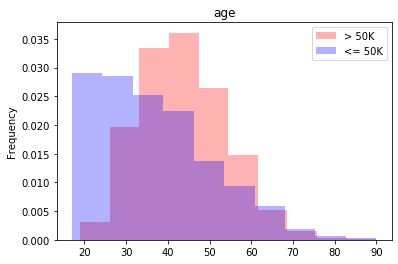

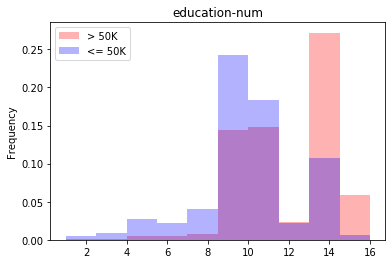

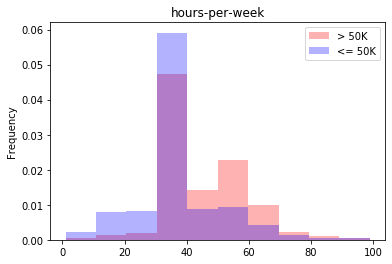

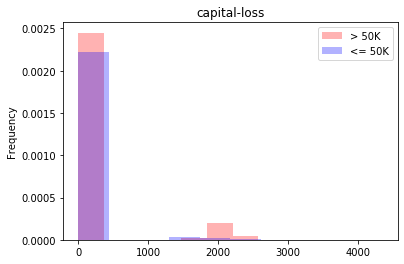

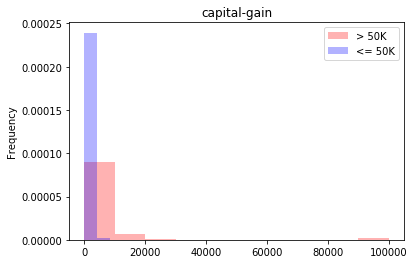

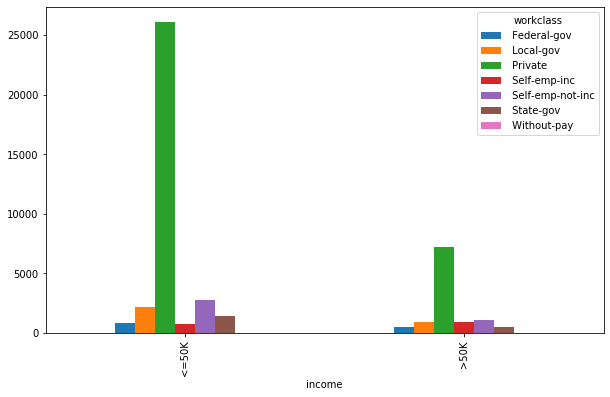

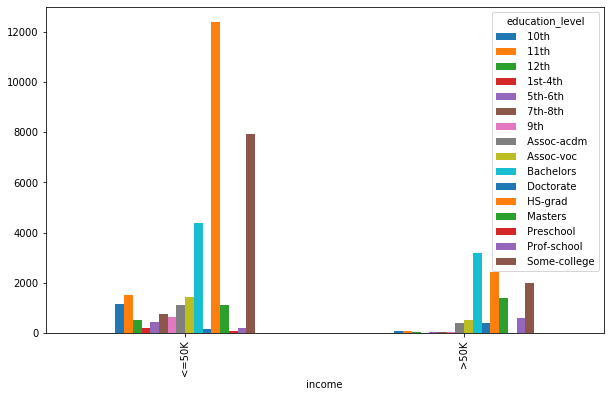

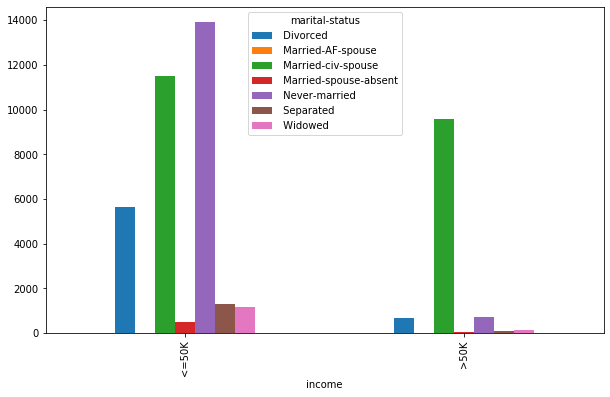

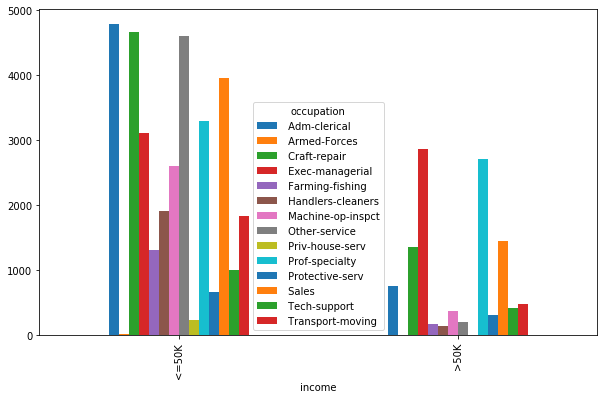

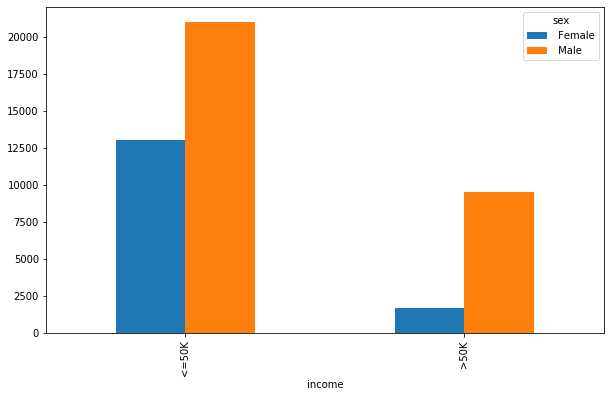

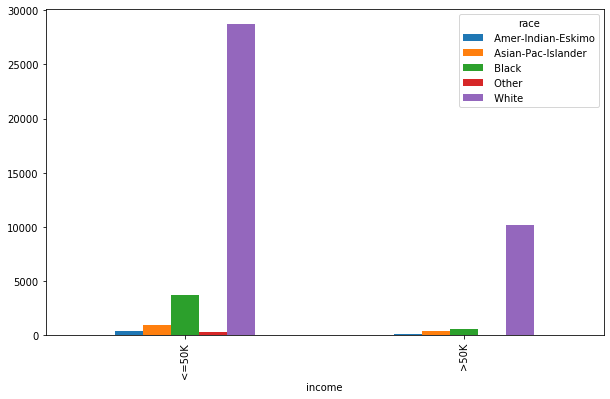

In [169]:
### Plotting  some relationships!
import matplotlib.pyplot as plt

# data['workclass'].hist(by='income')
def plotHist(col):
    i = 1
    x1 = data.loc[data.income=='>50K', col]
    x2 = data.loc[data.income=='<=50K', col]

    kwargs = dict(alpha=0.3, density=True, stacked=True)


    plt.hist(x1, **kwargs,  color='r', label= '> 50K')
    plt.hist(x2, **kwargs,  color='b', label= '<= 50K')
    plt.gca().set(title=col, ylabel='Frequency')
    plt.legend()
    plt.show()
    i = i+1

contCols = ['age', 'education-num', 'hours-per-week', 'capital-loss', 'capital-gain' ]
for col in contCols:
    plotHist(col)
    
    
from collections import Counter    
def plotClasses(col):
    groupCounts = data.groupby(['income',col])[col].count().unstack()
    fig, ax = plt.subplots(figsize=(10,6))
    data.groupby(['income',col])[col].count().unstack().plot(ax=ax, kind='bar')
    
classCols = ['workclass', 'education_level', 'marital-status', 'occupation','sex', 'race']    
for col in classCols:
    plotClasses(col)


**Answer:**

------

By looking at the columns available, I'd rank the following columns as most important:
1. age -> Age can easily be an indication of experience, and the more experienced, the longer the career and probably a better salary on average.
2. education_level or education-num -> the more education, the tendency is that you can land a better job.
3. hours-per-week -> usually a Full-time employee will make more than a part-time person.
4. occupation -> depending on the type of work you have, you might get paid more or less
5. marital-status -> There may be a weak correlation in regards to individuals that are in a family environment having to provide for others versus single individuals that are not tied to family.

The Histograms above helped me reorganize the list a little. They help clarify where some clusters of data are available. For example, older individuals seem to earn more than younger ones. Or individuals with higher levels of education also cluster towards more income.

-----


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

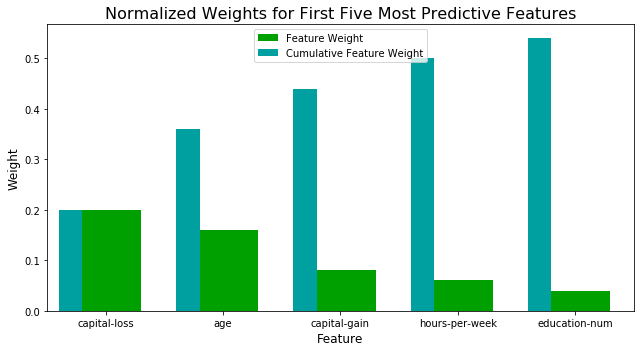

In [170]:
# TODO: Import a supervised learning model that has 'feature_importances_'
from sklearn.ensemble import AdaBoostClassifier

# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = AdaBoostClassifier()
model.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:** 

--- 

From the five top features selected by the AdaBoost algorithm, three matched my list  - age, hours-per-week, and education-num. capital-loss and capital-gain I didn't understand exactly what they mean and maybe some extra analysis on those features would've helped better understand their meaning. Also, I noticed the algorithm gave a slightly more weight towards hours-per-week, even though the histogram above shows that the data seems more skewed towards higher levels for education-num. But they still seem pretty close by weights on AdaBoost.

It is interesting to see that, at least in this algorithm, the top 5 features have continuous values. I wonder if the algorithm is biased towards this type of features, or just a coincidence. I tried analyzing some of the data for capital-gain and capital-loss, but after running some histogram similar to what I did for the other features, checking the data for sparsity and graphing it, still could not find a clear correlation for income. This is where functions like  **feature_importances_** can help determine mathematically good features to use instead of simply eye-balling them or trying to  do ancillary analysis.

---


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [172]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8422
F-score on testing data: 0.6870

Final Model trained on reduced data
------
Accuracy on testing data: 0.7866
F-score on testing data: 0.5076


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

----

After reducing the features to only the top five columns selected by our algorithm, we saw an overall decrease in our accuracy and F-scores. While accuracy only went down about 6 points, our F-score went down 18 points. Taking into consideration that now we are training with a very small subset of the data, It is somewhat impressive that the scores are still relatively good. Especially in regards to accuracy. Maybe because the data is biased to records with incomes lower than $50K, the F-score is suffering a much bigger drop compared to when the model is used with the full set of features. Unfortunately, the f-score wasn't so great to begin with; we just were able to get a 68% and dropping it to 50% seems that our model became a coin toss - not very accurate at all.

The greatest amount of time was spent on the exercise of finding the best hyperparameters with the GridSearch. Once those parameters were determined, training time with the current data set, even for all features does not seem too long. This is assuming the model is used in an offline fashion, where users are not waiting for the model to be trained to have an answer. Therefore, for this case, I'd continue to use the full set of features to improve the accuracy of our model.
But this trick can be very useful in real-time scenarios where the model has to be trained on the fly to provide an answer. Say, we chose the KNeighborClassifier instead of SVC, training times there are much faster at the expense of longer predicting times. Maybe this type of algorithm will make more sense to use a smaller set of features to achieve faster results.

----



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.